In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/blue-yonder/pydse/master/pydse/data/sales-of-shampoo-over-a-three-ye.csv")
data.head()
# data.describe()

,"Month;""Sales"""
0,01-01;266
1,01-02;145.9
2,01-03;183.1
3,01-04;119.3
4,01-05;180.3


In [3]:
data["Month"] = data['Month;"Sales"'].apply(lambda x : "20" + x.split(";")[0])
data["Sales"] = data['Month;"Sales"'].apply(lambda x : x.split(";")[1])
dta = data.drop('Month;"Sales"', axis=1)

In [4]:
data

,"Month;""Sales""",Month,Sales
0,01-01;266,2001-01,266
1,01-02;145.9,2001-02,145.9
2,01-03;183.1,2001-03,183.1
3,01-04;119.3,2001-04,119.3
4,01-05;180.3,2001-05,180.3
5,01-06;168.5,2001-06,168.5
6,01-07;231.8,2001-07,231.8
7,01-08;224.5,2001-08,224.5
8,01-09;192.8,2001-09,192.8
9,01-10;122.9,2001-10,122.9


In [5]:
from datetime import datetime
dta["Month"] = dta["Month"].apply(lambda x:datetime.strptime(x, "%Y-%m"))

In [6]:
dta

,Month,Sales
0,2001-01-01,266
1,2001-02-01,145.9
2,2001-03-01,183.1
3,2001-04-01,119.3
4,2001-05-01,180.3
5,2001-06-01,168.5
6,2001-07-01,231.8
7,2001-08-01,224.5
8,2001-09-01,192.8
9,2001-10-01,122.9


In [7]:
df = dta.copy()
df.set_index(df["Month"], inplace=True)
df = df.drop("Month", axis = True).astype(float)
df

,Sales
Month,
2001-01-01,266.0
2001-02-01,145.9
2001-03-01,183.1
2001-04-01,119.3
2001-05-01,180.3
2001-06-01,168.5
2001-07-01,231.8
2001-08-01,224.5
2001-09-01,192.8


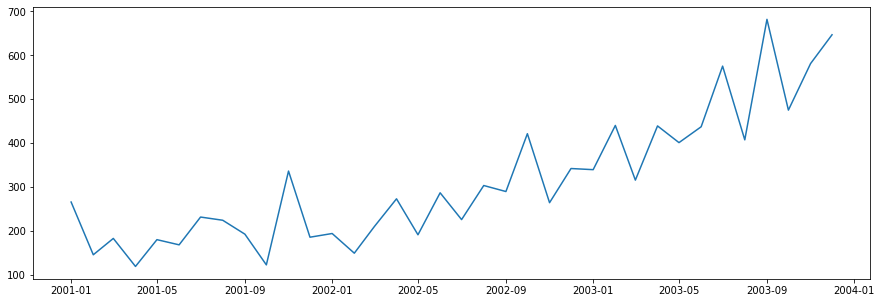

In [8]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15, 5))
fig.patch.set_facecolor("white")
fig.add_subplot(111)
plt.plot(df)
plt.show()


In [9]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df["Sales"])
# H0 : Data is not stationary
# H1 : Data is stationary


def adfuller_test(sales):
    result = adfuller(sales)
    labels = ["adfuller test statistics", "p value", "lags used", 'Number of observations used']
    for value, label in zip(result, labels):
        print(label+ " : "+ str(value))
    if result[1] <= 0.05:
        print("Reject null hypothesis. data is stationary")
    else:
        print("Accept null hypothesis. data is non stationary")
            
adfuller_test(df["Sales"])

adfuller test statistics : 3.0601420836411815
p value : 1.0
lags used : 10
Number of observations used : 25
Accept null hypothesis. data is non stationary


In [10]:
# Defferencing
df["first difference"] = df['Sales'] - df["Sales"].shift(1)
df

,Sales,first difference
Month,,
2001-01-01,266.0,NaN
2001-02-01,145.9,-120.1
2001-03-01,183.1,37.2
2001-04-01,119.3,-63.8
2001-05-01,180.3,61.0
2001-06-01,168.5,-11.8
2001-07-01,231.8,63.3
2001-08-01,224.5,-7.3
2001-09-01,192.8,-31.7


In [11]:
adfuller_test(df["first difference"].dropna())

adfuller test statistics : -7.249074055553854
p value : 1.7998574141687034e-10
lags used : 1
Number of observations used : 33
Reject null hypothesis. data is stationary


<AxesSubplot:xlabel='Month'>

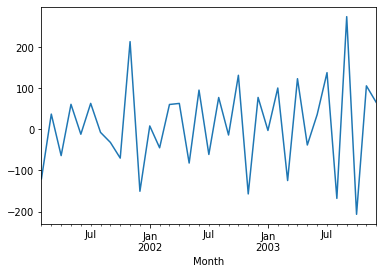

In [12]:
df["first difference"].dropna().plot()

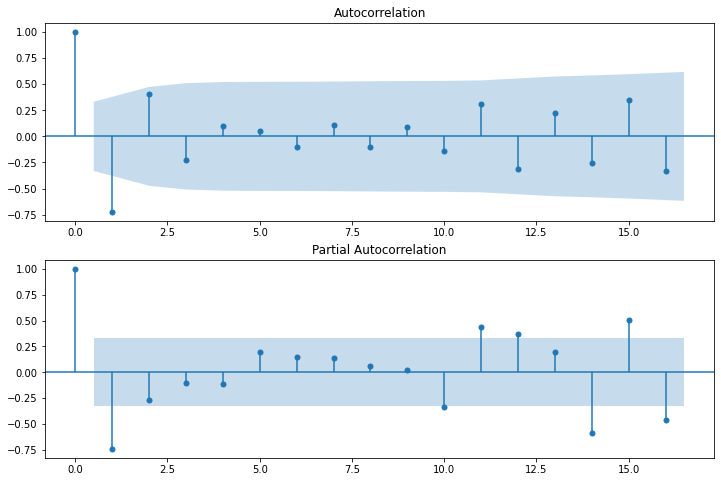

In [13]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig = plt.figure(figsize=(12,8))
fig.patch.set_facecolor("white")
ax1 = fig.add_subplot(211)
fig = plot_acf(df["first difference"].dropna(), lags = 16, ax = ax1)
ax1 = fig.add_subplot(212)
fig = plot_pacf(df["first difference"].dropna(), lags = 16, ax = ax1)

In [14]:
# d = 1 one seasonal differencing done
dt = df["Sales"].dropna()
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(dt, order=(10,1,1))
fittedmodel = model.fit()
# fit_model.summary()
fittedmodel.params

C:\Users\vishnu_nadh\anaconda3\envs\EDA_ML\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\vishnu_nadh\anaconda3\envs\EDA_ML\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\vishnu_nadh\anaconda3\envs\EDA_ML\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\vishnu_nadh\anaconda3\envs\EDA_ML\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


ar.L1       -0.353062
ar.L2        0.315057
ar.L3        0.301855
ar.L4        0.420439
ar.L5        0.418703
ar.L6        0.012713
ar.L7       -0.087469
ar.L8       -0.231472
ar.L9       -0.075350
ar.L10       0.199429
ma.L1       -0.800832
sigma2    3682.451459
dtype: float64

In [15]:
import statsmodels.api as sm
print(fittedmodel.aic, fittedmodel.bic, fittedmodel.hqic)

414.3336744088398 432.9978511467127 420.77654559414844


In [16]:
dw_test_value = sm.stats.durbin_watson(fittedmodel.resid.values)
dw_test_value


1.8817294379955074

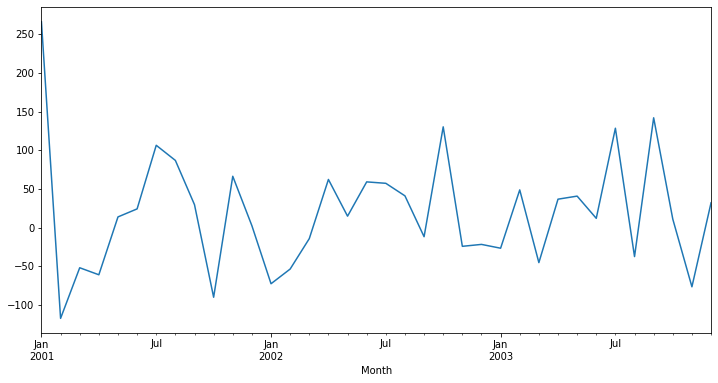

In [17]:
# plot residuals
fig = plt.figure(figsize=(12,6))
fig.patch.set_facecolor('white')
ax = fig.add_subplot(111)
fig = fittedmodel.resid.plot(ax= ax)

In [18]:
from scipy import stats
resids = fittedmodel.resid
stats.normaltest(resids)


NormaltestResult(statistic=8.649712972783556, pvalue=0.013235449427351522)

C:\Users\vishnu_nadh\anaconda3\envs\EDA_ML\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


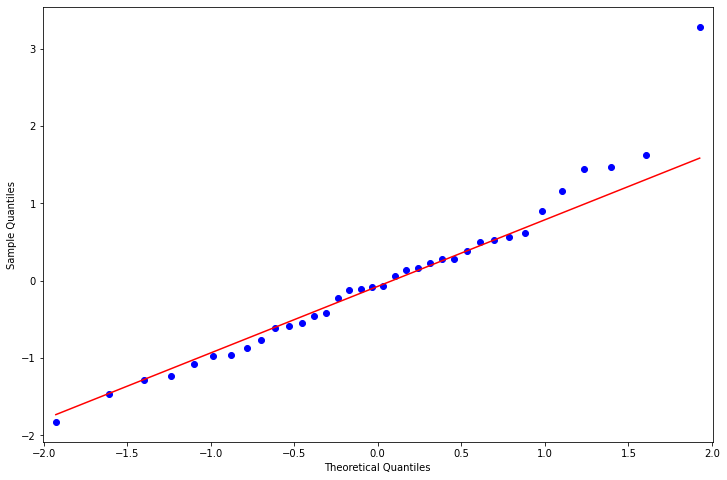

In [19]:
from statsmodels.graphics.api import qqplot

%matplotlib inline
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
fig = qqplot(resids, line='q', ax=ax, fit=True)

In [20]:
prediction = fittedmodel.predict("2003-01-01", "2003-12-01", dynamic=True)
prediction

C:\Users\vishnu_nadh\anaconda3\envs\EDA_ML\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


2003-01-01    366.409629
2003-02-01    387.591593
2003-03-01    383.906682
2003-04-01    374.663034
2003-05-01    397.513148
2003-06-01    405.175110
2003-07-01    431.408307
2003-08-01    444.282735
2003-09-01    411.378882
2003-10-01    456.760249
2003-11-01    453.659035
2003-12-01    480.256633
Freq: MS, Name: predicted_mean, dtype: float64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


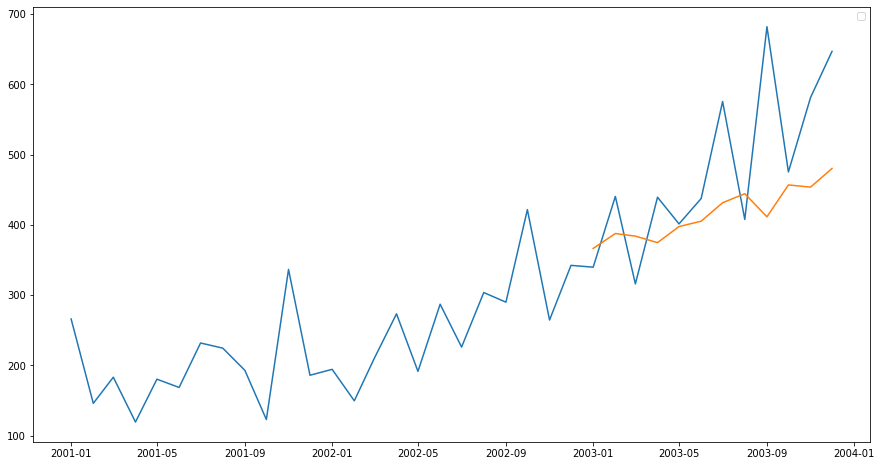

In [21]:
fig = plt.figure(figsize=(15,8))
fig.patch.set_facecolor("w")
ax = fig.add_subplot(111)
ax = plt.plot(dt)
ax = plt.plot(prediction)
plt.legend()
plt.show()


In [22]:
# find the best model
p_values = [10,11,12,14,15,16]
sums = []
for p in p_values:
    dt = df["Sales"].dropna()
    from statsmodels.tsa.arima.model import ARIMA
    model = ARIMA(dt, order=(p,1,1))
    fittedmodel = model.fit()
    sum = fittedmodel.aic + fittedmodel.bic + fittedmodel.hqic
    sums.append(sum)
    # fit_model.summary()
    

C:\Users\vishnu_nadh\anaconda3\envs\EDA_ML\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\vishnu_nadh\anaconda3\envs\EDA_ML\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\vishnu_nadh\anaconda3\envs\EDA_ML\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\vishnu_nadh\anaconda3\envs\EDA_ML\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\vishnu_nadh\anaconda3\envs\EDA_ML\lib\site-packages\statsmodels\tsa\base\t

In [23]:
print(p_values)
print(sums)

[10, 11, 12, 14, 15, 16]
[1268.108071149701, 1239.2677915093473, 1238.438330681796, 1217.2186518517888, 1255.773248426974, 1333.8545927342534]


In [3]:
# set p = 14
dt = df["Sales"].dropna()
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(dt, order=(14,1,1))
fittedmodel = model.fit()

prediction = fittedmodel.predict("2003-01-01", "2004-12-01", dynamic=True)

fig = plt.figure(figsize=(15,8))
fig.patch.set_facecolor("w")
ax = fig.add_subplot(111)
ax = plt.plot(dt)
ax = plt.plot(prediction)
plt.legend()
plt.show()



NameError: name 'df' is not defined

In [25]:
import pickle
file_dir = open("model/arima.pickle", "wb")
pickle.dump(fittedmodel, file_dir)

In [4]:
import pickle
model_file = open("model/arima.pickle", "rb")
model = pickle.load(model_file)
predvals = model.predict("2003-02-01", "2003-01-01", dynamic=True)
predvals

ValueError: Prediction must have `end` after `start`.